In [2]:
pip install pandas plotly ipywidgets voila

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


# 📊 UOP Library Dashboard
### 📅 Date: 2025-03-28
### 👥 Total Visitors Today: 516


### 📈 Dashboard Charts Explained:
- **Chart 1:** Visitors per Zone – shows how busy each area is.
- **Chart 2:** Seat Utilization – proportion of seats in use in each zone.
- **Chart 3:** Available Seats – how many seats are still open for new visitors (corrected for no negatives).
- **Chart 4:** Visitors vs Occupancy – visualizes visitor load vs seating, with bubble size showing seat usage rate.


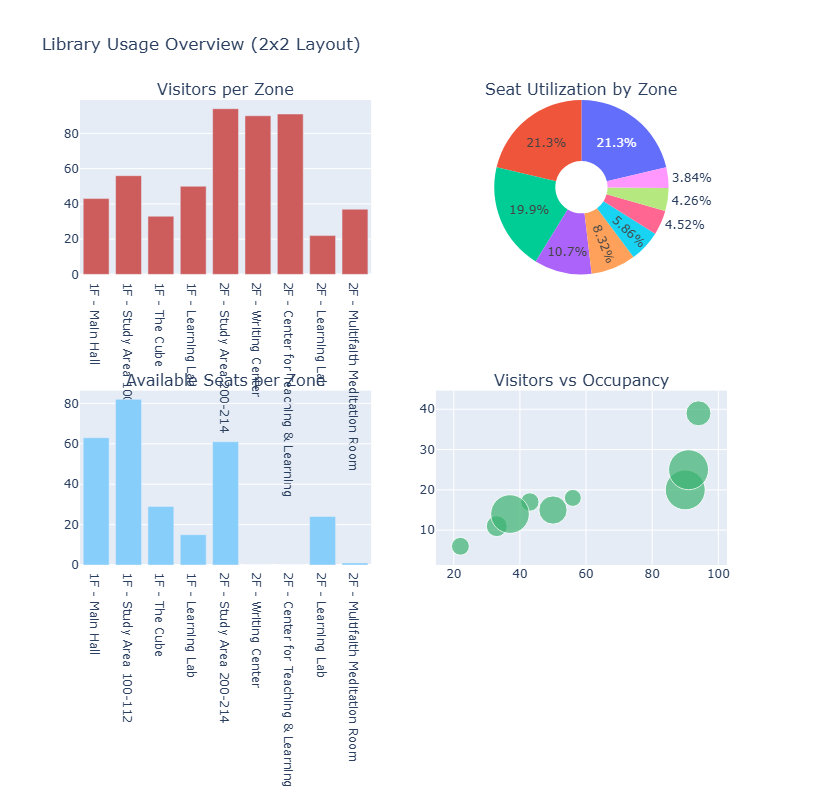

interactive(children=(Dropdown(description='Select Zone', options=('1F - Main Hall', '1F - Study Area 100-112'…

<function __main__.show_area_detail(selected_area)>

In [5]:
# 📊 UOP Library Dashboard (Based on Floor Maps - 2x2 Layout)

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, Markdown, HTML
import random
from datetime import datetime

# Define library zones by floor and function
areas = [
    '1F - Main Hall',
    '1F - Study Area 100-112',
    '1F - The Cube',
    '1F - Learning Lab',
    '2F - Study Area 200-214',
    '2F - Writing Center',
    '2F - Center for Teaching & Learning',
    '2F - Learning Lab',
    '2F - Multifaith Meditation Room'
]

today = datetime.now().strftime('%Y-%m-%d')

# Simulate data
data = {
    'Date': [today] * len(areas),
    'Zone': areas,
    'Visitors': [random.randint(20, 120) for _ in areas],
    'Total Seats': [80, 100, 40, 30, 100, 20, 25, 30, 15]
}

df = pd.DataFrame(data)
df['Available Seats'] = df['Total Seats'] - df['Visitors'].apply(lambda x: int(x * random.uniform(0.3, 0.7)))
df['Available Seats'] = df['Available Seats'].apply(lambda x: max(x, 0))  # Prevent negative values

df['Utilization (%)'] = ((df['Total Seats'] - df['Available Seats']) / df['Total Seats'] * 100).round(1)
df['Occupancy'] = df['Total Seats'] - df['Available Seats']

# Prevent zero division in scatter sizeref
max_util = max(df['Utilization (%)']) if max(df['Utilization (%)']) > 0 else 1

# Total visitor count
total_visits = df['Visitors'].sum()

# Display title and summary info
display(Markdown(f"# \U0001F4CA UOP Library Dashboard\n### \U0001F4C5 Date: {today}\n### \U0001F465 Total Visitors Today: {total_visits}"))

# Dashboard intro text
display(Markdown("""
### 📈 Dashboard Charts Explained:
- **Chart 1:** Visitors per Zone – shows how busy each area is.
- **Chart 2:** Seat Utilization – proportion of seats in use in each zone.
- **Chart 3:** Available Seats – how many seats are still open for new visitors (corrected for no negatives).
- **Chart 4:** Visitors vs Occupancy – visualizes visitor load vs seating, with bubble size showing seat usage rate.
"""))

# Create 2x2 subplot layout with pie support
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "xy"}, {"type": "domain"}],
           [{"type": "xy"}, {"type": "xy"}]],
    subplot_titles=("Visitors per Zone", "Seat Utilization by Zone",
                    "Available Seats per Zone", "Visitors vs Occupancy")
)

# Chart 1 - Bar: Visitors
fig.add_trace(go.Bar(x=df['Zone'], y=df['Visitors'], name='Visitors', marker_color='indianred'), row=1, col=1)

# Chart 2 - Pie: Utilization
fig.add_trace(go.Pie(labels=df['Zone'], values=df['Utilization (%)'], name='Utilization', hole=0.3), row=1, col=2)

# Chart 3 - Bar: Available Seats
fig.add_trace(go.Bar(x=df['Zone'], y=df['Available Seats'], name='Available Seats', marker_color='lightskyblue'), row=2, col=1)

# Chart 4 - Scatter: Visitors vs Occupancy
fig.add_trace(go.Scatter(
    x=df['Visitors'],
    y=df['Occupancy'],
    mode='markers',
    marker=dict(size=df['Utilization (%)'], color='mediumseagreen', sizemode='area', sizeref=2.*max_util/(40.**2), sizemin=4),
    text=df['Zone'],
    name='Visitors vs Occupancy'), row=2, col=2)

fig.update_layout(height=800, width=1100, showlegend=False, title_text="Library Usage Overview (2x2 Layout)")
fig.show()

# Dropdown for zone detail view
dropdown = widgets.Dropdown(options=areas, description="Select Zone")

def show_area_detail(selected_area):
    area_data = df[df['Zone'] == selected_area].iloc[0]
    display(Markdown(f"""
### \U0001F4CD Zone: {selected_area}
- \U0001F465 Current Visitors: **{area_data['Visitors']}**
- \U0001F9F4 Total Seats: **{area_data['Total Seats']}**
- ✅ Available Seats: **{area_data['Available Seats']}**
- \U0001F501 Utilization Rate: **{area_data['Utilization (%)']}%**
"""))

widgets.interact(show_area_detail, selected_area=dropdown)
